<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L230823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Web crawling
2. 교재 : part 1
3. 자료 변환
    - numpy
	- 중복값 제거와 값 대체
	- 구간 나누기 : pd.cut
	- 범주형 데이터 : 개념, vectorization, get_dummies
	- 판다스에서 문자열 처리하기 (query 사용)
	- 조인, 병합, 변형
4. 교재 : part2 ~ 4
5. 데이터 그룹 연산
	- group, apply
6. 교재 : part 5 ~ 6

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(6).reshape(3, 2)

In [ ]:
arr

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
arr.shape

(3, 2)

In [ ]:
arr.ndim

2

In [ ]:
brr = np.array([[10, 20], [30, 40]])

In [ ]:
brr

array([[10, 20],
       [30, 40]])

In [ ]:
brr.shape

(2, 2)

In [ ]:
np.dot(arr, brr)

array([[ 30,  40],
       [110, 160],
       [190, 280]])

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.dot(x,w)+ b
    if tmp < 0:
        return 0
    else:
        return 1

In [ ]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [ ]:
def NAND(x1, x2): # Not AND
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.dot(x,w)+ b
    if tmp < 0:
        return 0
    else:
        return 1

In [ ]:
print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.dot(x,w)+ b # 0.5 * x1 + 0.5 * x2 + b = tmp <0 -> 0, tmp>=0 ->1
    if tmp < 0:
        return 0
    else:
        return 1

In [ ]:
print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
print(XOR(0,0))

0


In [ ]:
print(XOR(0,1))

1


In [ ]:
print(XOR(1,0))

1


In [ ]:
print(XOR(1,1))

0


In [ ]:
# 0.5 * x1 + 0.5 * x2 + b = tmp <0 -> 0, tmp>=0 ->1

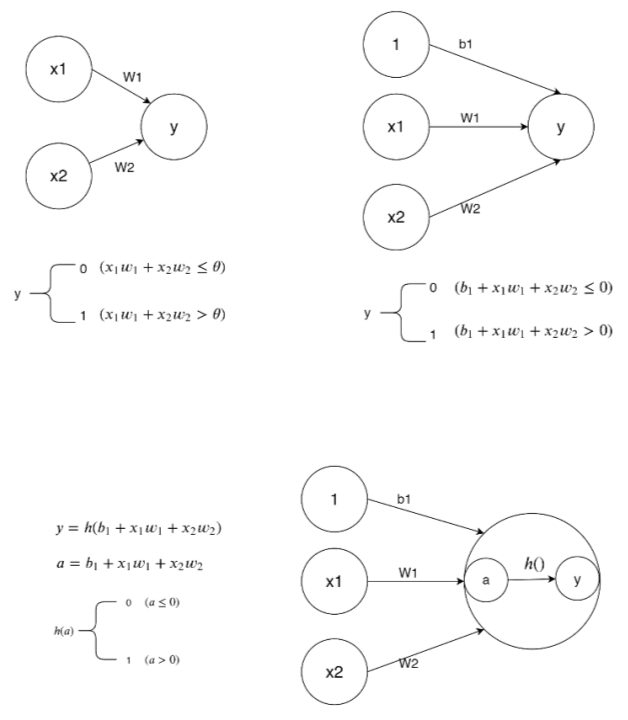

$$
x_1 w_1 + x_2 w_2 \\
\quad \\
\\
y=
\begin{cases}
0, & (x_1w_1+x_2w_2 \leq \theta) \\
1, & (x_1w_1+x_2w_2 \gt \theta)
\end{cases}
\\
\quad \\
\\
b_1 = -\theta
\\
\quad \\
\\
y=
\begin{cases}
0, & (b_1 + x_1w_1+x_2w_2 \leq 0) \\
1, & (b_1 + x_1w_1+x_2w_2 \gt 0)
\end{cases}
\\
\quad \\
\\
a = b_1 + x_1w_1+x_2w_2
\\
\quad \\
\\
y = h(a) \\
\quad \\
\\
h(a) =
\begin{cases}
0, & (a\leq 0) \\
1, & (a \gt 0)
\end{cases}\\
\quad \\
\\
f(x) =
\begin{cases}
0, & (x\leq 0) \\
1, & (x \gt 0)
\end{cases}
$$

In [ ]:
def step_func(x):
    if x>0:
        return 1
    else:
        return 0

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.arange(-5, 5, 0.1)

In [ ]:
x[:3]

array([-5. , -4.9, -4.8])

In [ ]:
y = x>0

In [ ]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
y.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
def step_func(x):
    y = x>0
    y = y.astype(int)
    return y

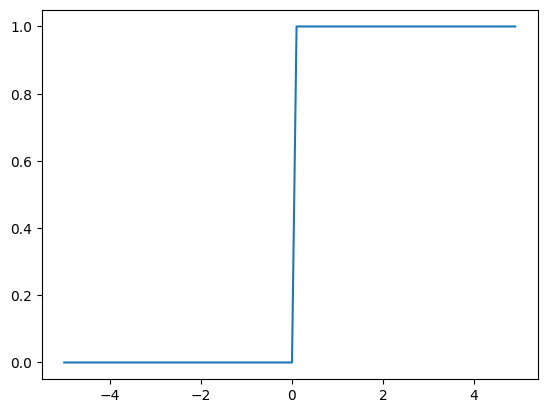

In [ ]:
plt.plot(x, step_func(x))

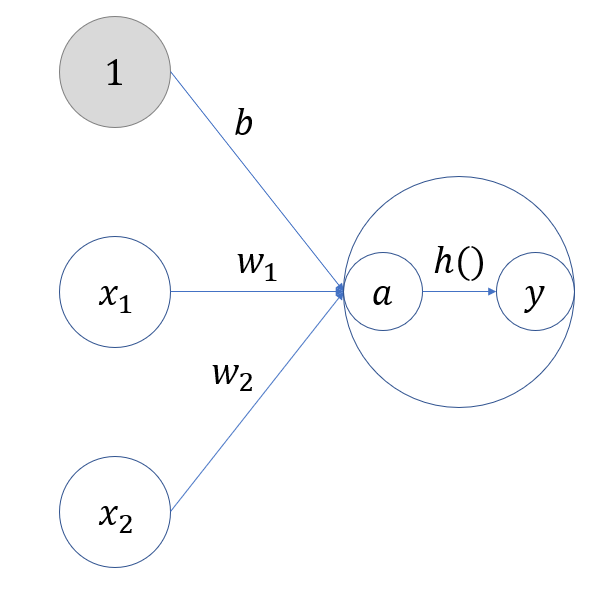

시그모이드 식
$$
\begin{equation*}
h(x) = \frac{1}{1 + e^{-x}}
\end{equation*}
$$

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x

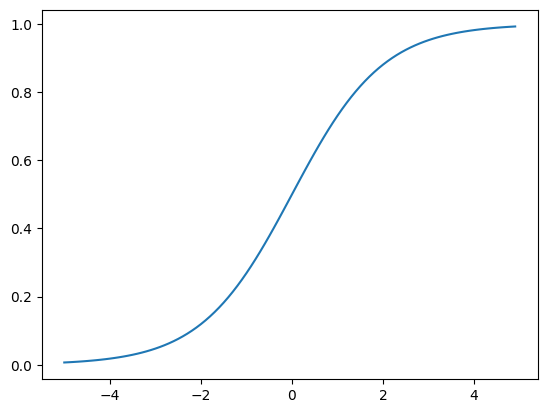

In [ ]:
plt.plot(x, sigmoid(x))

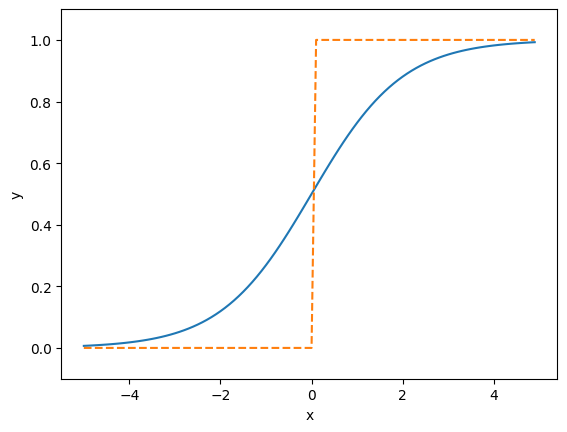

In [ ]:
y1 = sigmoid(x)
y2 = step_func(x)

plt.plot(x, y1, label='sigmoid')
plt.plot(x, y2, linestyle='--', label='step_function')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
def relu(x):
    return np.maximum(0, x) # x = -10 -> 0, x=1 -> 1

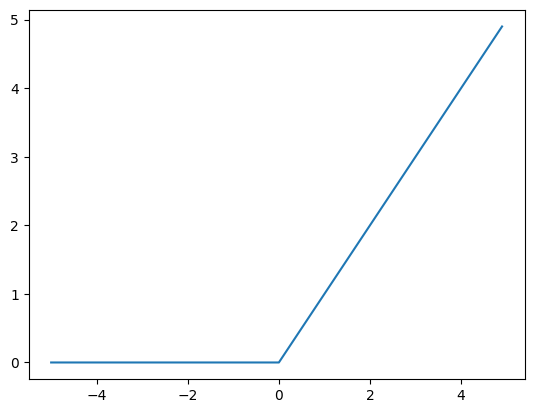

In [ ]:
plt.plot(x, relu(x))

In [ ]:
x = np.array([1, 2])

In [ ]:
x.shape

(2,)

In [ ]:
w = np.array([[1, 3, 5], [2, 4, 6]])

In [ ]:
w

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
w.shape

(2, 3)

In [ ]:
y = np.dot(x, w)

In [ ]:
y

array([ 5, 11, 17])

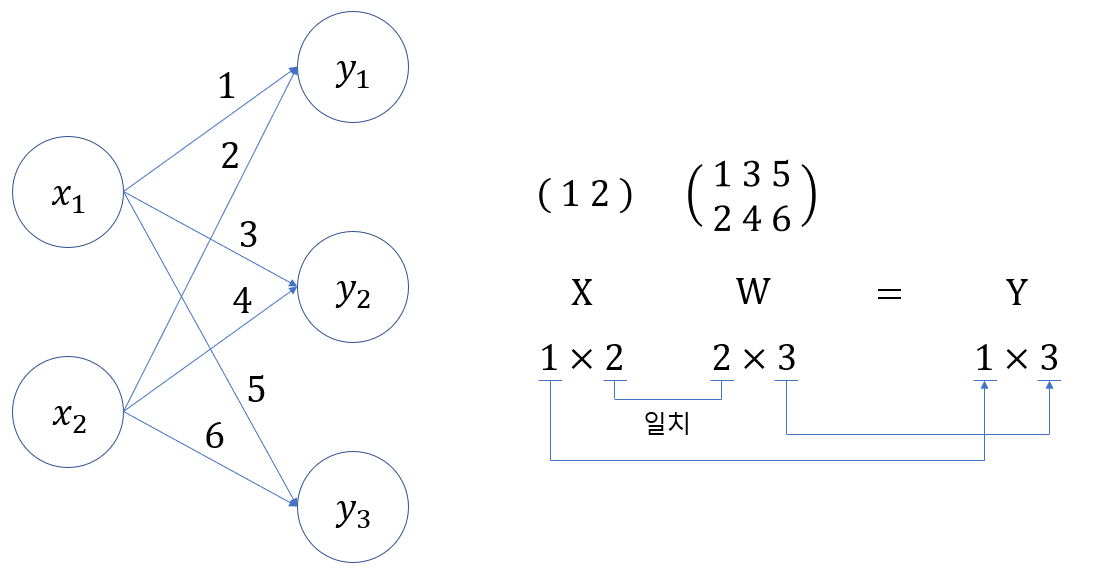

In [ ]:
def OR(x1, x2):
    x=np.array([x1, x2])
    w=np.array([1, 1])
    b = -0.5
    z1 = np.dot(x,w)+b # x2 + x1 - 0.5
    if z1 <=0:
        return 0
    else:
        return 1

In [ ]:
x1 = np.linspace(-1, 2, 20)

In [ ]:
x1

array([-1.        , -0.84210526, -0.68421053, -0.52631579, -0.36842105,
       -0.21052632, -0.05263158,  0.10526316,  0.26315789,  0.42105263,
        0.57894737,  0.73684211,  0.89473684,  1.05263158,  1.21052632,
        1.36842105,  1.52631579,  1.68421053,  1.84210526,  2.        ])

x2 + x1 - 0.5 = 0

x2 = -x1 + 0.5

y = x + 1 -> y - x - 1 = 0

In [ ]:
x2 = -x1 + 0.5

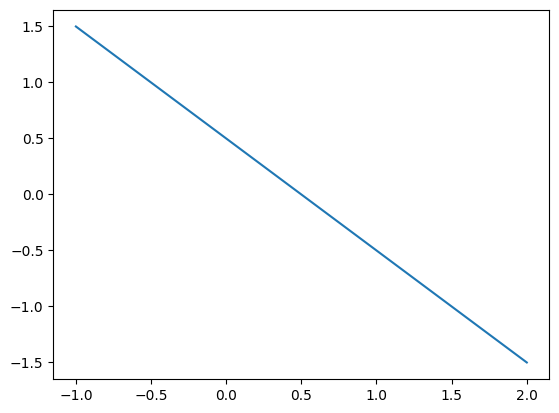

In [ ]:
plt.plot(x1, x2)

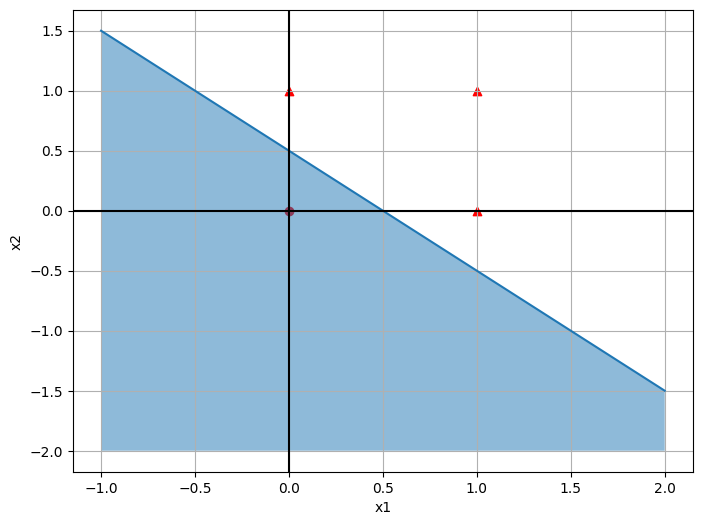

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(x1, x2)

plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.xlabel("x1") # x축 이름
plt.ylabel("x2") # y축 이름
plt.fill_between(x1,x2,-2, alpha=0.5) # y값에서 y축의 -3 까지의 값들에 대해 색깔칠해준다.
plt.grid()

In [ ]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


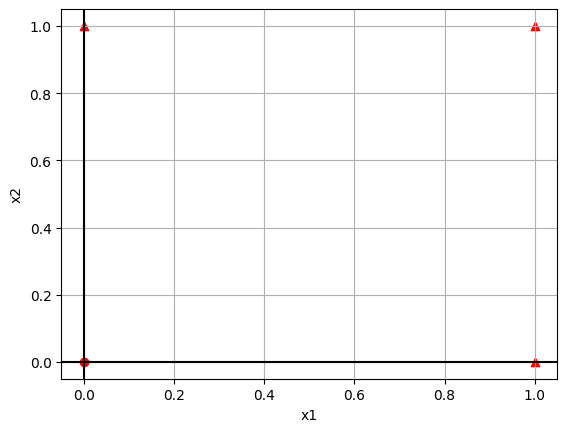

In [ ]:
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.xlabel("x1") # x축 이름
plt.ylabel("x2") # y축 이름
#plt.fill_between(x1,x2,-2, alpha=0.5) # y값에서 y축의 -3 까지의 값들에 대해 색깔칠해준다.
plt.grid()

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
print(XOR(0, 0)) # 0을 출력
print(XOR(1, 0)) # 1을 출력
print(XOR(0, 1)) # 1을 출력
print(XOR(1, 1)) # 0을 출력

0
1
1
0


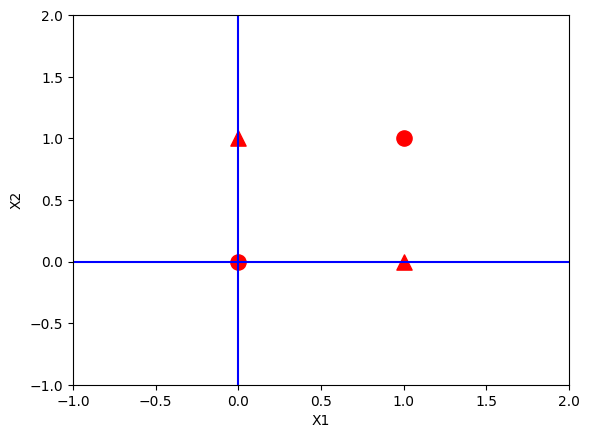

In [ ]:
x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5
plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름

plt.scatter([0,1],[0,1],marker='o',color='r', s=120)
plt.scatter([1,0],[0,1],marker='^',color='r', s=120)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
np.nan #==None

nan

In [ ]:
string_data = pd.Series(['a', 'b', np.nan, 'c'])

In [ ]:
string_data

0      a
1      b
2    NaN
3      c
dtype: object

In [ ]:
pd.isnull(string_data)

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
string_data[0]=None

In [ ]:
string_data

0    None
1       b
2     NaN
3       c
dtype: object

In [ ]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [ ]:
from numpy import nan as NA

In [ ]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [ ]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data = pd.DataFrame([[1, 6.5, 3], [1, NA, NA], [NA, NA, NA], [NA, 6.5, 3]])

In [ ]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [ ]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
data[4] = NA

In [ ]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(how='all', axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
df = pd.DataFrame(np.random.randn(7,3))

In [ ]:
df

,0,1,2
0,-0.643221,0.424906,-0.159441
1,0.131558,0.804466,-0.457259
2,-1.568829,0.100599,0.034729
3,-0.141220,-1.012337,-2.059267
4,2.915873,3.337049,1.160947
5,-1.474065,-0.313652,0.985385
6,0.085463,-0.110145,1.738271


In [ ]:
df.shape

(7, 3)

In [ ]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

In [ ]:
df

,0,1,2
0,-0.643221,NaN,NaN
1,0.131558,NaN,NaN
2,-1.568829,NaN,0.034729
3,-0.141220,NaN,-2.059267
4,2.915873,3.337049,1.160947
5,-1.474065,-0.313652,0.985385
6,0.085463,-0.110145,1.738271


In [ ]:
df.dropna()

,0,1,2
4,2.915873,3.337049,1.160947
5,-1.474065,-0.313652,0.985385
6,0.085463,-0.110145,1.738271


In [ ]:
df.dropna(thresh=2)

,0,1,2
2,-1.568829,NaN,0.034729
3,-0.141220,NaN,-2.059267
4,2.915873,3.337049,1.160947
5,-1.474065,-0.313652,0.985385
6,0.085463,-0.110145,1.738271


In [ ]:
df.fillna(0.0)

,0,1,2
0,-0.643221,0.000000,0.000000
1,0.131558,0.000000,0.000000
2,-1.568829,0.000000,0.034729
3,-0.141220,0.000000,-2.059267
4,2.915873,3.337049,1.160947
5,-1.474065,-0.313652,0.985385
6,0.085463,-0.110145,1.738271


In [ ]:
df.fillna({1:0.5, 2:0.0})

,0,1,2
0,-0.643221,0.500000,0.000000
1,0.131558,0.500000,0.000000
2,-1.568829,0.500000,0.034729
3,-0.141220,0.500000,-2.059267
4,2.915873,3.337049,1.160947
5,-1.474065,-0.313652,0.985385
6,0.085463,-0.110145,1.738271


In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA

In [ ]:
df

,0,1,2
0,-0.990989,1.841376,-0.230059
1,-0.210256,0.603064,-0.902064
2,0.386391,NaN,0.876550
3,1.053956,NaN,0.195960
4,0.772881,NaN,NaN
5,-1.311555,NaN,NaN


In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-0.990989,1.841376,-0.230059
1,-0.210256,0.603064,-0.902064
2,0.386391,0.603064,0.876550
3,1.053956,0.603064,0.195960
4,0.772881,0.603064,0.195960
5,-1.311555,0.603064,0.195960


In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.990989,1.841376,-0.230059
1,-0.210256,0.603064,-0.902064
2,0.386391,0.603064,0.876550
3,1.053956,0.603064,0.195960
4,0.772881,NaN,0.195960
5,-1.311555,NaN,0.195960


In [ ]:
df.fillna(df.mean())

,0,1,2
0,-0.990989,1.841376,-0.230059
1,-0.210256,0.603064,-0.902064
2,0.386391,1.222220,0.876550
3,1.053956,1.222220,0.195960
4,0.772881,1.222220,-0.014903
5,-1.311555,1.222220,-0.014903


In [ ]:
data = pd.DataFrame({'k1':['one', 'two']*3 + ['two'], 'k2':[1, 1, 2, 3, 3, 4, 4]})

In [ ]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
data['v1'] = range(7)

In [ ]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [ ]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


In [ ]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [ ]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
lowercased = data['food'].str.lower()

In [ ]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [ ]:
lowercased.map(meat_to_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)

In [ ]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [ ]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace(-999., np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999., -1000.], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
data.replace([-999., -1000.], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
data.replace({-999.:np.nan, -1000.:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)), index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:
tf = lambda x : x[:4].upper()

In [ ]:
data.index.map(tf)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [ ]:
data.index = data.index.map(tf)

In [ ]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data.rename(index = str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [ ]:
data.rename(index={'OHIO':'INDIANA'}, columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
len(ages)

12

In [ ]:
bins = [18, 25, 35, 60, 100]

In [ ]:
pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

(18, 25] == 19 ~ 25

(25, 35] == 26 ~ 35

In [ ]:
cats = pd.cut(ages, bins)

In [ ]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
type(cats)

pandas.core.arrays.categorical.Categorical

Categorical data = Category + Categorical code

In [ ]:
ages

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
cats.codes #분류 그룹의 번호

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [ ]:
fruits = ['apple', 'orange', 'apple', 'apple']*2

In [ ]:
fruits

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']

In [ ]:
df = pd.DataFrame(fruits)

In [ ]:
df

,0
0,apple
1,orange
2,apple
3,apple
4,apple
5,orange
6,apple
7,apple


In [ ]:
cat_df = df[0].astype('category')

In [ ]:
cat_df

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: 0, dtype: category
Categories (2, object): ['apple', 'orange']

In [ ]:
cat_df.cat.categories

Index(['apple', 'orange'], dtype='object')

In [ ]:
cat_df.cat.codes

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int8

.str. : 문자열 메서드 사용

.cat. : 범주형 데이터 메서드 사용

.dt. : datetime 메서드 사용

In [ ]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [ ]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [ ]:
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [ ]:
data = np.random.rand(5)

In [ ]:
data

array([0.18980057, 0.02986705, 0.26632369, 0.40222904, 0.28239537])

In [ ]:
pd.cut(data, 4, precision=2)

[(0.12, 0.22], (0.029, 0.12], (0.22, 0.31], (0.31, 0.4], (0.22, 0.31]]
Categories (4, interval[float64, right]): [(0.029, 0.12] < (0.12, 0.22] < (0.22, 0.31] < (0.31, 0.4]]

In [ ]:
data = np.random.randn(1000)

In [ ]:
cats = pd.qcut(data, 4)

In [ ]:
cats

[(0.719, 3.077], (0.719, 3.077], (-3.229, -0.691], (0.719, 3.077], (-0.691, -0.00211], ..., (-3.229, -0.691], (-3.229, -0.691], (-3.229, -0.691], (-0.691, -0.00211], (-3.229, -0.691]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.229, -0.691] < (-0.691, -0.00211] < (-0.00211, 0.719] <
                                           (0.719, 3.077]]

In [ ]:
pd.value_counts(cats)

(-3.229, -0.691]      250
(-0.691, -0.00211]    250
(-0.00211, 0.719]     250
(0.719, 3.077]        250
dtype: int64

In [ ]:
data = pd.DataFrame(np.random.randn(1000,4))

In [ ]:
data

,0,1,2,3
0,-0.234008,-0.568703,-0.324726,-0.832946
1,-0.397602,-0.351270,-0.780080,-1.007263
2,-0.889363,2.098644,-0.187191,-0.328667
3,0.056156,-0.376128,-0.729780,0.579044
4,-0.074154,-0.692937,2.233446,-1.714941
...,...,...,...,...
995,0.184341,2.010878,-0.080173,-0.473327
996,-1.620621,0.313453,1.162751,0.129316
997,0.666799,0.189995,0.418519,2.725636
998,1.209017,-1.995978,-1.009143,0.169697


In [ ]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.060171,0.007055,-0.012972,0.025666
std,0.992249,0.995227,1.006061,1.030379
min,-3.408040,-2.911336,-3.645833,-2.983988
25%,-0.611907,-0.638263,-0.653370,-0.691345
50%,0.077525,-0.005122,0.017182,0.027240
75%,0.736541,0.683928,0.643868,0.685800
max,2.898766,3.319220,3.407172,3.578517


In [ ]:
data

,0,1,2,3
0,-0.234008,-0.568703,-0.324726,-0.832946
1,-0.397602,-0.351270,-0.780080,-1.007263
2,-0.889363,2.098644,-0.187191,-0.328667
3,0.056156,-0.376128,-0.729780,0.579044
4,-0.074154,-0.692937,2.233446,-1.714941
...,...,...,...,...
995,0.184341,2.010878,-0.080173,-0.473327
996,-1.620621,0.313453,1.162751,0.129316
997,0.666799,0.189995,0.418519,2.725636
998,1.209017,-1.995978,-1.009143,0.169697


In [ ]:
col = data[2]

In [ ]:
col

0     -0.324726
1     -0.780080
2     -0.187191
3     -0.729780
4      2.233446
         ...   
995   -0.080173
996    1.162751
997    0.418519
998   -1.009143
999   -0.255288
Name: 2, Length: 1000, dtype: float64

In [ ]:
col[np.abs(col)>3]

38    -3.645833
129   -3.094403
141    3.407172
212    3.169861
293   -3.237852
391   -3.419125
739   -3.071520
Name: 2, dtype: float64

In [ ]:
data[(np.abs(data)>3).any(axis=1)]

,0,1,2,3
27,0.672842,0.303634,0.173359,3.149559
38,0.658486,0.211666,-3.645833,1.200973
129,-0.929371,-2.719124,-3.094403,2.301993
141,0.212025,0.878150,3.407172,0.014343
159,1.387393,-0.821587,0.559034,3.157677
212,-0.030723,0.099053,3.169861,-0.080175
293,-0.189061,-0.670316,-3.237852,-0.070650
386,-0.105027,3.319220,-0.970488,0.207146
391,0.721808,1.358633,-3.419125,-0.134840
481,-3.084642,-0.576640,0.644547,-0.293165


In [ ]:
np.sign(data) #  값이 음수면 -1.0, 양수면 1.0 출력

,0,1,2,3
0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,-1.0
3,1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,1.0,-1.0
...,...,...,...,...
995,1.0,1.0,-1.0,-1.0
996,-1.0,1.0,1.0,1.0
997,1.0,1.0,1.0,1.0
998,1.0,-1.0,-1.0,1.0


In [ ]:
np.sign(data)*3

,0,1,2,3
0,-3.0,-3.0,-3.0,-3.0
1,-3.0,-3.0,-3.0,-3.0
2,-3.0,3.0,-3.0,-3.0
3,3.0,-3.0,-3.0,3.0
4,-3.0,-3.0,3.0,-3.0
...,...,...,...,...
995,3.0,3.0,-3.0,-3.0
996,-3.0,3.0,3.0,3.0
997,3.0,3.0,3.0,3.0
998,3.0,-3.0,-3.0,3.0


In [ ]:
data[np.abs(data)>3] = np.sign(data)*3

In [ ]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.060814,0.006736,-0.012080,0.024449
std,0.990162,0.994214,0.999517,1.026617
min,-3.000000,-2.911336,-3.000000,-2.983988
25%,-0.611907,-0.638263,-0.653370,-0.691345
50%,0.077525,-0.005122,0.017182,0.027240
75%,0.736541,0.683928,0.643868,0.685800
max,2.898766,3.000000,3.000000,3.000000


In [ ]:
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,-1.0
3,1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,1.0,-1.0


In [ ]:
df = pd.DataFrame({'key':['b','b', 'a', 'c', 'a', 'b'], 'data1':range(6)})

In [ ]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
dummies  = pd.get_dummies(df['key'], prefix='key')

In [ ]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
df_dummies = df[['data1']].join(dummies)

In [ ]:
df_dummies

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [ ]:
ls

movies.dat  sample_data/


In [ ]:
cat movies.dat

In [ ]:
!head movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller


In [ ]:
!tail movies.dat

3943::Bamboozled (2000)::Comedy
3944::Bootmen (2000)::Comedy|Drama
3945::Digimon: The Movie (2000)::Adventure|Animation|Children's
3946::Get Carter (2000)::Action|Drama|Thriller
3947::Get Carter (1971)::Thriller
3948::Meet the Parents (2000)::Comedy
3949::Requiem for a Dream (2000)::Drama
3950::Tigerland (2000)::Drama
3951::Two Family House (2000)::Drama
3952::Contender, The (2000)::Drama|Thriller


read_table

sep = '::'

header = None

names = ['movie_id', 'title', 'genres']

In [ ]:
df=pd.read_table('/content/movies.dat',
                 sep='::',header= None ,
                 names =['movie_id','title','genres'])

<ipython-input-203-bd742a1d1980>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_table('/content/movies.dat',


In [ ]:
df

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                              1.0
Genre_Children's                             1.0
Genre_Comedy                                 1.0
Genre_Adventure                              0.0
Genre_Fantasy                                0.0
Genre_Romance                                0.0
Genre_Drama                                  0.0
Genre_Action                                 0.0
Genre_Crime                                  0.0
Genre_Thriller                               0.0
Genre_Horror                                 0.0
Genre_Sci-Fi                                 0.0
Genre_Documentary                            0.0
Genre_War                                    0.0
Genre_Musical                                0.0
Genre_Mystery                                0.0
Genre_Film-Noir                              0.0
Genre_Western       

In [ ]:
movies_windic

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


칼럼이름이 모두 장르 이름으로 죽 나열되어 있을때

[Animation, Children's, Comedy]

0, 1, 2

get_indexer

pd.Series.str.get_dummies

In [ ]:
df.columns = ['movie_id', 'title', 'Genres']
df_dummies = df['Genres'].str.get_dummies(sep='|')

In [ ]:
df_dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns = ['movie_id', 'title', 'Genres']
df_dummies = df['Genres'].str.get_dummies(sep='|')
df_dummies = df_dummies.add_prefix('Genres_')
movies_windic = df.join(df_dummies)
movies_windic

,movie_id,title,Genres,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_dummies

,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,Genres_Drama,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
